# Métodos Numericos 2023

## Parcial 2

### Fecha de entrega 

8 de Junio de 2023

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Agregue comentarios a su código de ser necesario.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.

In [1]:
using Plots
using LaTeXStrings
using DataFrames
using CSV
using LsqFit

### Problema

**Contexto físico**

Los datos incluidos en el archivo adjunto `datos.dat` representan los tiempos de medición $t_i$ (primera columna) y posición $z_i$ (segunda columna) de una gota de agua en caída libre pero afectada por la resistencia impuesta por el aire. 
La posición se mide a lo largo de la perpendicular a la tierra ($z$), el origen de coordenadas se fija en el punto de partida de la gota, la cual tiene velocidad inicial nula.

Este experimento, ideado originalmente por el físico Philipp Lennard, ganador del Premio Nobel de Física en 1905 por sus investigaciones sobre los rayos catódicos y sus propiedades, consiste en medir durante la caída libre de la gota su posición para diferentes tiempos, los cuales, en este caso se escogieron equiespaciados.

A partir de suponer que la gota está sometida a la fuerza gravitacional que le ejerce la tierra y una fuerza restitutiva de rozamiento proporcional a su velocidad:
$$
\vec{F}=\vec{F_g} + \vec{F_R} = -mg \hat{z} - cv \hat{z}
$$
y usando las leyes de Newton, es posible deducir la posición $z$ en función del tiempo, como veremos más adelante en este parcial.
En este ejercicio no nos interesa que entiendan la física del experimento, pues lo verán más adeltante en la carrera, pero queremos que vean cómo se resuelven problemas físicos no triviales combinando variados métodos numéricos. 

**Incisos a resolver**

1. Lea los datos del archivo `datos.dat` y grafique las posiciones $z_i$ en función de los tiempos $t_i$. Los datos son tales que la unidad de tiempos es segundos $[\mathrm{s}]$ y la de posiciones es metros $[\mathrm{m}]$. Describa cualitativamente el comportamiento de la gota.

2. Calcule **numéricamente** la velocidad de la gota para cada uno de los tiempos de medición. Use el método centrado de cinco puntos en los puntos centrales, el método centrado de tres puntos en el segundo y el anteúltimo, y el de dos puntos en el primer y en el último punto. 

3. Grafique la aproximación de la velocidad $v_i$ calculada, en función del tiempo $t_i$. Describa cualitativamente el comportamiento temporal de la velocidad de la gota.

4. Grafique la velocidad $v_i$ en función de posición $z_i$. Describa cualitativamente cómo la velocidad de la gota cambia a medidad que cambia su posición.

5. Sabiendo que la ecuación que describe la posición de la gota en función del tiempo es:
    $$
    z(t)= - g\,\alpha\,t + g\,\alpha^2\, \left(1-e^{-t/\alpha} \right)
    $$
    donde $\alpha=m/c$, realice un ajuste de cuadrados mínimos de las posiciones $z_i$ en función de los tiempos $t_i$ y obtenga una estimación de los parámetros $\alpha$ y $g$. Verifique que los residuos son relativamente pequeños. Explicite los resultados del ajute en una celda en formato texto y LaTeX. En particular, compare el valor ajustado de $g$, con el comunmente utilizado de $g=9,81\,\mathrm{m}/\mathrm{s}^2$.

6. Use que $\alpha = m/c$ y que la masa de la gota es $m=0.001\,\mathrm{Kg}$ para determinar el valor de $c$. Explicite en una celda en formato texto y LaTex el valor obtenido de $c$. Además, especifique las unidades que tiene $\alpha$ y las uniades que tiene $c$.

7. Grafique la curva $z(t)$ ajustada con lo puntos especificados en el archivo `datos.dat` superpuestos.

8. Al descender la gota por efecto de la fuerza  gravitatoria que ejerce la tierra sobre ella al tiempo que es frenada por una fuerza restauradora proporcional a menos su velocidad (debida a la viscocidad del aire), la gota del experimento recibe un trabajo. La expresión de dicho trabajo, como debe usted recordar de sus clases de Física General I, está dada por:
    $$
    W = \int_{t_{\mathrm{inicial}}}^{t_{\mathrm{final}}} \vec{F}.\vec{v} \, dt    
    $$ 
    donde
    $$
    \vec{F} = -m\,g \hat{z} \; - c\,v(t)\hat{z}
    $$
    es la fuerza total actuante sobre la gota.

    Para calcular el trabajo, emplee el algoritmo de integración del método de Simpson compuesto para intervalos equiespaciados, utilizando los $t_i$ proveídos en los datos y las correspondientes aproximaciones de $v_i$ del inciso 2. Explicite el resultado del cómputo en una celda en formato texto y LaTeX.

    Aproxime la integral nuevamente, dividiendo el intervalo de tiempo en $100$ subintervalos ($n=101$ puntos) y usando correspondientes valores de $v(t)$ calculados a partir de la derivada analítica de la expresión del ajuste de $z(t)$. Compare resultados con la aproximación anterior.

9. Cuando la trayectoria del objeto no se cruza a si misma, una forma equivalente de calcular el trabajo proviene de la expresión:
    $$
    W = \int_{z_{\mathrm{inicial}}}^{z_{\mathrm{final}}} \; \vec{F}.\vec{dz} \nonumber \\
    $$
    Aproxime nuevamente el trabajo $W$ integrando esta otra expresión, utilizando el método del trapecio para intervalos **no equiespaciados**, y usando los puntos $z_i$ proveídos en los datos y las correspondientes aproximaciones $v_i$ del inciso 2.
    
    Compare resultados con el inciso anterior.
    
    **Ayuda:** Note que deberá implementar el el método del trapecio para intervalos **no equiespaciados**. Le recomendamos chequear el correcto funcionamiento del método, aproximando la integral
    
    $$
    \int_0^1 \sin(x)\,dx
    $$
    
    usando el siguiente arreglo de puntos de integración $x = [0.0,0.1,0.3,0.5,0.8,1.0]$. Debería darle $\approx 0.457421559686$.

10. Para verificar si las integrales le dieron el resultado correcto, calcule también el trabajo como:

    $$
    W=E_{\mathrm{cinética}}(t)-E_{\mathrm{cinética}}(0)
    $$
    
    donde
    
    $$
    E_{\mathrm{cinética}}(t) = \frac{1}{2}m v^2(t)
    $$

    Utilice para ello la velocidad final del ajuste. Imprima este valor también por pantalla.

11. A partir del archivo `datos.dat`, interpole la posición como función del tiempo con el método del polinomio interpolante de Lagrange dividiendo el intervalo de tiempo en $100$ subintervalos ($n=100$). Grafique, en un único gráfico, las siguientes curvas entre $t_i$ y $t_f$:
    1. Los puntos medidos $z_i$ vs $t_i$,
    2. el polinomio interpolante de Lagrange y
    3. la curva de la posición ajustada en el inciso 4.
   
12. Explique en una celda los resultados obtenidos.

### Respuestas

#### 1. 

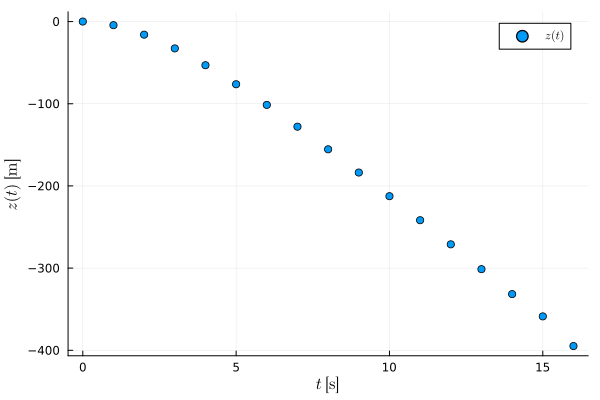

In [2]:
data = CSV.read("datos.dat", DataFrame, delim=" ", ignorerepeated=true)

t = data[!,1]
z = data[!,2]

scatter(t,z, label=L"z(t)")
plot!(xlabel=L"t \ \mathrm{[s]}", ylabel=L"z(t) \  \mathrm{[m]}")


La gota cae, se acelera por la gravedad y se frena por la fuerza de roce por el aire alcanzando una velocidad terminal constante.

#### 2.

In [3]:
"""
Derivada numerica
t : (array) valor de t (abscisas)
z : (array) valor de z(t) (ordenadas)

return : (array) derivada z'(t)"""
function D(t,z)
    
    v = zeros(length(t))
    h = t[2] - t[1]

    #derivada para los puntos centrales
    for j in 3:(length(t)-2)
        v[j] = (-z[j+2] + 8*z[j+1] - 8*z[j-1] + z[j-2])/(12*h)
    end
    
    #derivada para el segundo y anteultimo 
    v[2]     = (z[3] - z[1])/(2*h)
    v[end-1] = (z[end] - z[end-2])/(2*h)
    
    #derivada para el primero y ultimo
    v[1]   = (z[2] - z[1])/h
    v[end] = (z[end] - z[end-1])/h
    
    return v
end

D

In [4]:
v = D(t,z)

17-element Vector{Float64}:
  -4.412
  -7.9855
 -14.424166666666665
 -18.784666666666666
 -21.9545
 -24.240000000000006
 -25.883583333333338
 -27.079916666666666
 -27.938750000000002
 -28.54916666666664
 -29.036166666666663
 -29.252500000000012
 -29.77166666666663
 -30.610583333333324
 -28.000000000000032
 -31.608499999999992
 -36.091999999999985

#### 3.

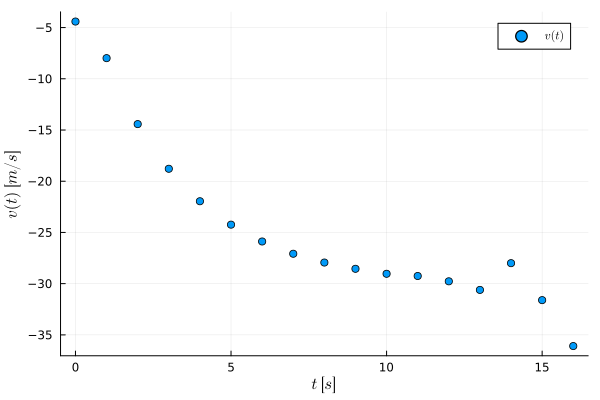

In [5]:
scatter(t,v, label=L"v(t)")
plot!(xlabel=L"t \ [s]", ylabel=L"v(t) \  [m/s]")

La gota se acelera en los primeros segudos de caida, y se frena hasta llegar a una velocidad casi constate debido a que las fuerzas de gravedad y rozamiento se igualan.

#### 4.

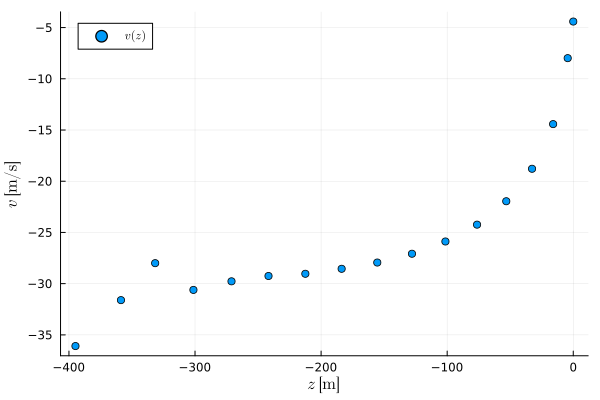

In [6]:
scatter(z,v, label=L"v(z)")
plot!(xlabel=L"z \ \mathrm{[m]}", ylabel=L"v \ \mathrm{[m/s]}")

La gota acelera a medida que su pocision se hace cada vez mas negativa (mas lejos de su pocision inicial), el mayor cambio de velocidad se da en los primeros $50$ m, que corresponde con la aceleracion por la gravedad, y a partir de los $100$ m su cambio con respecto a la pocision se vuelve aproximadamente lineal

#### 5.

In [7]:
# funcion posicion z(t)
# parametros de ajuste: α, g 
# Ver residuos 
# Comparar valores de g con tabla
x = t
y = z

function modelo_z(t,p)
    return -p[1]*p[2]*t + p[1]*(p[2]^2)*(1-exp(-t/p[2]))
end

p0 = [9.81, 3.14]

modelo(t,p) = @. -p[1]*p[2]*t + p[1]*(p[2]^2)*(1-exp(-t/p[2]))

fit = curve_fit(modelo, x, y, p0)
fit.param

2-element Vector{Float64}:
 9.67980802531526
 3.1439064131137466

In [8]:
α_medido = fit.param[2]

3.1439064131137466

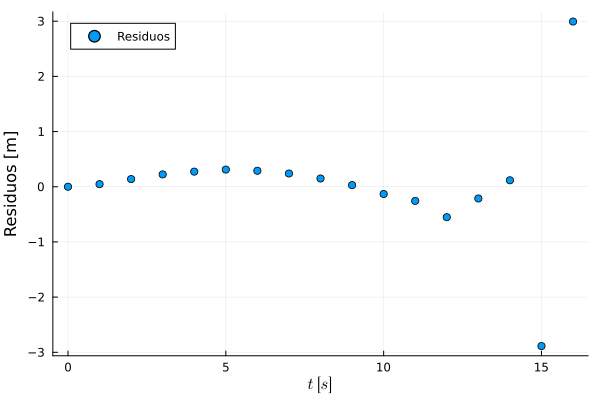

In [9]:
scatter(x,fit.resid, label="Residuos")

plot!(xlabel=L"t \ [s]")
plot!(ylabel="Residuos [m]")

In [10]:
g_tabla = 9.81
g_medido = fit.param[1]

dif = g_tabla - g_medido
err_por = abs(g_tabla - g_medido)/abs(g_tabla)*100

1.3271353178872576

Los valores ajustados son:

$g = 9.67980802531526 \ \mathrm{m/s^2}$

$\alpha = 3.1439064131137466 \ \mathrm{s} $

El valor de $g$ ajustado difiere del tabulado por $0.13019197468473998 \ \mathrm{m/s^2}$, que equivale a un error porcentual de ~ $1.3 \%$

#### 6.

In [11]:
m = 0.001 #kg
c_medido = m/ α_medido # kg/s

0.0003180756258611379

$c = 0.0003180756258611379 \ \mathrm{kg / s}$ 

$[\alpha] = \mathrm{s}$

$[c] = \mathrm{kg/s}$ 

#### 7.

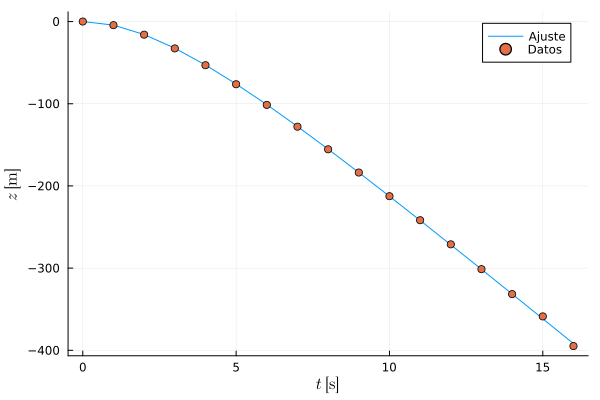

In [12]:
plot(t, modelo(t,fit.param), label="Ajuste")
scatter!(t,z, label="Datos")

plot!(xlabel=L"t \ \mathrm{[s]}")
plot!(ylabel=L"z \ \mathrm{[m]}")

#### 8.

In [13]:
"""
Integracion numerica con el metodo de Simpson.
x : (array) valores de x
y : (array) valores de y(x)
v : (bool, opcional) verbose

return: (array) integral de y(x) entre minimo y maximo de x"""
function int_simpson(x,y;v=false)
    
    n = length(x)
    
    if n%2 != 0
        if v
            println("$n es impar, cambiando por $(n-1)")
        end
        n -= 1
    end
    
    h = (x[end]-x[1])/n
    s0 = y[end]+y[1]
    s1 = 0.
    s2 = 0.
    
    for i in 2:n-1
        if i%2==0
            s2 += y[i]
        else
            s1 += y[i]
        end
    end
        
    integral = (h/3)*(s0+2*s2+4*s1)
    
    return integral
    
end

int_simpson

In [14]:
m = 0.001#kg
F = -(m*g_medido .+ c_medido*v)
W = int_simpson(t,F.*v)

0.4543308930193593

El trabajo realizado sobre la gota (calculado a partir de la velocidad $v_i$ y los valores de $g$,$c$ ajustados) es

$W = 0.4543308930193593 \ \mathrm{J}$

In [15]:
"""
Integracion numerica con el metodo de Simpson.
f : (function) integrando
a : (float) limite inferior
b : (float) limite superior
v : (bool, opcional) verbose

return: (array) integral de f entre a y b"""
function S_S(f,a,b,n;v=false)
    
    if n%2 != 0
        if v
            println("$n es impar, cambiando por $(n+1)")
        end
        n = n+1
    end
    
    h = (b-a)/n
    s1 = 0.
    s2 = 0.
    for j in 1:n//2-1
        s1 += f(a+2*j*h)
    end
    for j in 1:n//2
        s2 += f(a+(2*j-1)*h)
    end
    return (f(a) + f(b) + 2*s1 + 4*s2)*h/3 
    
end

S_S

In [16]:
v_an(t) = -g_medido*α*(1-exp(-t/α))
α = α_medido
integrand(t) = (-v_an.(t)*c_medido .- m*g_medido).*v_an.(t)
W_an = S_S(integrand,0.,16.,101)

0.457375525916633

El trabajo realizado sobre la gota (calculado a partir de la velocidad $v(t) = \frac{d z(t)}{d t}$  y los valores de $g$,$c$ ajustados) es

$W_{an} = 0.457375525916633 \ \mathrm{J}$

In [17]:
er_abs = abs(W - W_an)
er_por = er_abs/abs(W_an)*100

0.6656746425537086

El trabajo calculado a partir de los datos y la velocidad analitica difieren en un error porcentual de ~ $0.67 \%$

#### 9.

In [18]:
"""
Integracion con el metodo del trapecio no equiespaciado
x : (array) valores de x
y : (array) valores de y(x)

return: (array) integral de y entre el minimo y maximo de x"""
function trapecio_no_equiespaciado(x, y)
    n = length(x)
    if n != length(y)
        throw(ArgumentError("Los vectores x e y deben tener la misma longitud"))
    end
    
    suma = 0.0
    for i in 2:n
        h = x[i] - x[i-1]
        suma += (y[i] + y[i-1]) * h
    end
    
    return suma / 2
end

trapecio_no_equiespaciado

In [19]:
#implementacion del metodo del trapecio no equiespaciado

x = [0.0,0.1,0.3,0.5,0.8,1.0]
y = @. sin(x)

println(trapecio_no_equiespaciado(x,y))

0.4574215596860132


In [20]:
W_9 = trapecio_no_equiespaciado(z,F)

0.4341436144975121

In [21]:
e_w = abs(W-W_9)/abs(W)*100
e_wan = abs(W_an-W_9)/abs(W_an)*100

5.0793953989036655

El trabajo realizado sobre la gota (calculado con la integral sobre la trayectoria de la particula y los valores de $g$,$c$ ajustados) es

$W_{9} = 0.4341436144975121 \ \mathrm{J}$

Comparado con $W$ (a partir de los datos) difiere en ~$4.4 \%$, y comparado con $W_{an}$ (a partir de $v(t)$) difiere en ~$5.1 \%$

#### 10.

In [22]:
g_medido = fit.param[1]
vel(t) = -g_medido * α_medido + g_medido * α_medido^2 * exp(-t/ α_medido)

v_f = vel(t[end])
W_10 = (1/2) * m * (v_f^2)

println(W_10)

0.4452953467634708


#### 11.

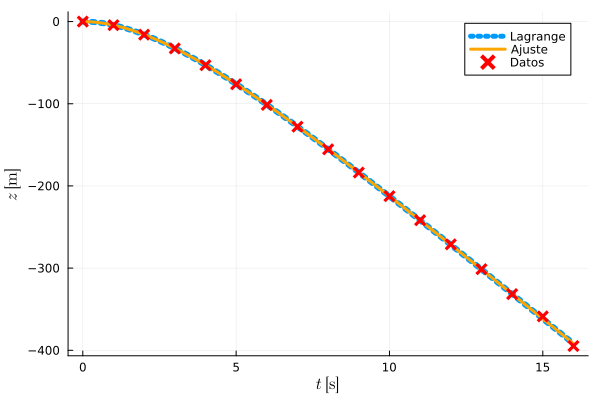

In [23]:
# interpolar la posicion en funcion del tiempo
# dividiendo el intervalo en 100 subintervalos
# n = 100 

"""
i : grado
x : valor de x
xvec : arreglo valores x_i
"""
function Li(i::Int64,
    x::Float64,
    xvec::Vector{Float64}
    )::Float64
    L = 1.0
    xi = xvec[i]
    for j ∈ 1:i-1
        xj = xvec[j]
        L *= (x-xj)/(xi-xj)
    end
    for j ∈ i+1:length(xvec)
        xj = xvec[j]
        L *= (x-xj)/(xi-xj)
    end
    return L
end


"""
x : valor x
xvec : arreglo valores x_i
yvec : arreglo valores y_i
"""
function PL(x::Float64,
    xvec::Vector{Float64},
    yvec::Vector{Float64}
    )::Float64
    Pl = 0.0
    for i ∈ 1:length(xvec)
        Pl += yvec[i]*Li(i,x,xvec)
    end
    return Pl
end


p = fit.param
modelo(t,p) = @. -p[1]*p[2]*t + p[1]*(p[2]^2)*(1-exp(-t/p[2]))
mod(t) = modelo(t,p)

n = 100
puntos = t 
valorfuncion = mod.(puntos)
PLf(x) = PL(x,puntos,valorfuncion)


# Unico grafico: 
# A. puntos z_i vs t_i
# B. polinomio interpolante de Lagrange
# C. Ajuste de la funcion (inciso 4)


pts = range(0.,16.,n)


plot(pts,PLf.(pts),label = "Lagrange", ls=:dot, lw=6)
plot!(mod, lw = 3, c = "orange", label = "Ajuste", alpha=1)
scatter!(t,z, c = "red", marker = :x,  markerstrokewidth = 4, ms = 5, label = "Datos")

plot!(xlabel=L"t \ \mathrm{[s]}")
plot!(ylabel=L"z \ \mathrm{[m]}")

#### 12.

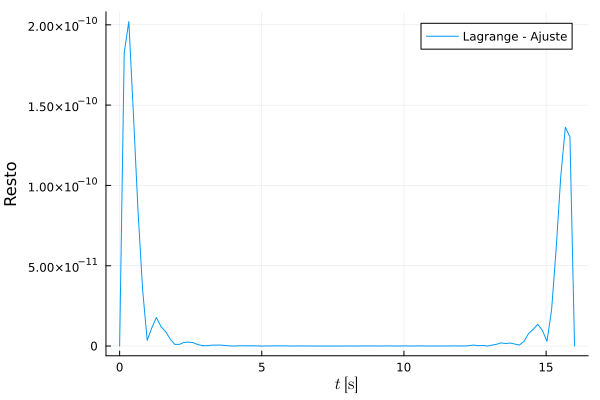

In [24]:
plot(pts, abs.(PLf.(pts) .- mod(pts)), label="Lagrange - Ajuste")
plot!(xlabel=L"t \ \mathrm{[s]}")
plot!(ylabel="Resto")

El grafico anterior muestra la diferencia entre el polinomio interpolante de Lagrange y el ajuste realizado, se puede ver que cerca de los bordes es donde ambos se separan lo que es esperable dado que el polinomio oscila fuera del rango donde interpolamos. Aun asi, la diferencia es del orden de $10^{-10}$.